Topic Modeling with NMF and SVD

The optimal decomposition would now be to cluster the documents into two groups, each of which has as different a distribution of words as possible to each other, but as similar as possible amongst the documents in the cluster. We will call those two groups "topics". And we would cluster the words into two groups, based on those which most frequently appear in each of the topics

In [1]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/edited_topics_all_news.csv')

In [6]:
X = df.processed_content
from sklearn.utils import shuffle

X = shuffle(X, random_state = 4)

y = df.processed_topic
y = shuffle(y, random_state = 4)

from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(891,) (891,) (383,) (383,)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(Xtrain).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(891, 15499)

In [9]:
print(len(Xtrain), vectors.shape)

891 (891, 15499)


In [10]:
vocab = np.array(vectorizer.get_feature_names())

In [11]:
vocab.shape

(15499,)

In [12]:
vocab[7000:7020]

array(['jorg', 'jose', 'josep', 'joseph', 'joshi', 'joshna', 'joshua',
       'jostl', 'journal', 'journalist', 'journey', 'joust', 'jowl',
       'joyc', 'joydeep', 'joypoor', 'jstor', 'juan', 'jubil', 'jubile'],
      dtype='<U15')

Singular Value Decomposition (SVD)

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

In [13]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 12.2 s, sys: 1.15 s, total: 13.3 s
Wall time: 7.01 s


In [14]:
print(U.shape, s.shape, Vh.shape)

(891, 891) (891,) (891, 15499)


In [15]:
#Confirm this is a decomposition of the input
U

array([[-7.78144625e-03,  8.72524192e-03,  8.57717794e-03, ...,
         3.32451413e-16, -9.51033487e-17,  2.30121911e-17],
       [-3.95755882e-02,  5.17740647e-02,  1.84249261e-02, ...,
         2.03086755e-02, -4.46246345e-02,  1.81672427e-02],
       [-5.64689880e-03,  8.16636441e-03,  3.43396960e-03, ...,
         3.08856738e-16,  4.04749612e-16,  6.06424768e-17],
       ...,
       [-1.81561439e-02,  2.44572640e-02,  4.37287449e-03, ...,
         1.31838984e-16, -5.96311195e-18, -5.20417043e-18],
       [-4.33480660e-03,  7.18961824e-03,  5.56059080e-03, ...,
        -9.54097912e-18, -6.78710560e-17, -9.19403442e-17],
       [-1.82183145e-02,  6.67235837e-03, -1.00769489e-02, ...,
        -6.74071809e-02, -5.04310575e-02, -2.30276898e-02]])

In [17]:
#s

In [18]:
Vh

array([[-1.60882155e-05, -1.74412879e-04, -5.53025989e-04, ...,
        -3.89592305e-05, -1.10174140e-04, -9.11078662e-05],
       [ 3.49918116e-05,  1.71471610e-04,  5.70549777e-04, ...,
         3.88166364e-05,  5.47919518e-05,  4.40739108e-05],
       [ 9.59285101e-05, -1.03498377e-03,  7.73283939e-04, ...,
        -7.41057908e-05,  3.83543338e-04,  3.49406752e-04],
       ...,
       [-9.66910194e-03,  1.40268277e-01, -1.54486343e-01, ...,
        -1.31327436e-04, -6.02649466e-05, -3.13507103e-04],
       [ 3.21473677e-03, -7.92662532e-02,  4.83203831e-02, ...,
         1.46776037e-04,  5.01575482e-05,  2.34125124e-04],
       [ 2.31210204e-02, -5.34944618e-02, -2.65281615e-02, ...,
         4.32308996e-04, -4.26239476e-04, -2.94820178e-04]])

In [21]:
V = np.transpose(Vh)

In [26]:
#U*s*Vh #==vectors

In [30]:
#Confirm that U, V are orthonormal

np.multiply(U,Vh)

ValueError: ignored

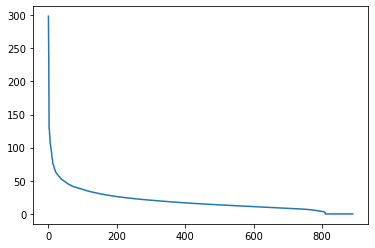

In [31]:
#Topics

#What can we say about the singular values s?

plt.plot(s);

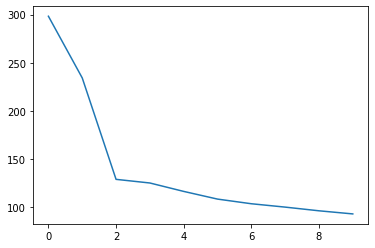

In [32]:
plt.plot(s[:10])

In [33]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [34]:
show_topics(Vh[:10])

['gusti thundershow vikasdubey microfin startupcapit vaidyasala botani prabhukumar',
 'say covid peopl case state polic time govern',
 'india china polic case say state govern chines',
 'say covid patient case hospit polic user test',
 'covid china patient india test hospit care chines',
 'polic say dubey china vika chines court film',
 'say school cafe student year coffe class educ',
 'china patient peopl chines cafe say polic film',
 'film peopl congress govern minist parti lockdown chief',
 'student school patient film class polic china hospit']

Non-negative Matrix Factorization (NMF)



In [38]:
m,n=vectors.shape
d=15  # num topics

In [39]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [40]:
show_topics(H1)

['indian user altern video applic mobil develop offer',
 'say year add work offici pandem tell month',
 'friend lucki today love like care zodiac time',
 'china india chines indian border militari area armi',
 'polic dubey say vika case arrest court alleg',
 'statu remov centuri protest citi year columbus slave',
 'case test covid state lockdown report govern peopl',
 'student school class educ onlin exam learn year',
 'film time peopl like work shoot play come',
 'cafe coffe say deliveri servic start like peopl',
 'congress minist parti govern leader chief pilot polit',
 'cent crore india govern sector price lockdown lakh',
 'patient covid hospit peopl care rehabilit intens say',
 'taiwan countri trump china health virus mask presid',
 'singh base india pakistan terrorist punjab terror khalistan']

(TF-IDF) is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

TF = (# occurrences of term t in document) / (# of words in documents)

IDF = log(# of documents / # documents with term t in it)

In [42]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(Xtrain) # (documents, vocab)

In [43]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [44]:
show_topics(H1)

['case death test covid state total number infect',
 'china india chines beij militari countri border modi',
 'film actor love shoot work stori charact releas',
 'polic dubey vika arrest say kill kanpur encount',
 'congress pilot mlas parti rajasthan minist gehlot chief',
 'student school class exam result teacher educ onlin',
 'cent crore bank market sector price infosi rise',
 'troop armi disengag chines galwan indian valley area',
 'user app relianc platform mobil video technolog indian',
 'test team england player cricket koh captain match',
 'court petit order suprem plea high govern justic',
 'patient hospit covid drug test say vaccin plasma',
 'trump snapchat presid biden say campaign elect poll',
 'statu remov slave columbus centuri protest slaveri coloni',
 'lockdown peopl govern india time spread say home']

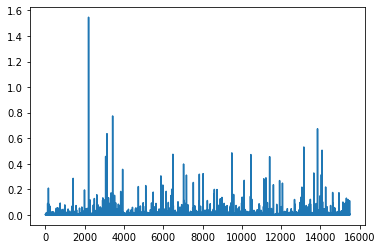

In [45]:
plt.plot(clf.components_[0])

In [46]:
clf.reconstruction_err_

27.65897067930081

In [ ]:
#NMF from scratch in numpy, using SGD



Applying SGD to NMF
Goal: Decompose V(m×n) into
V≈WH
where W(m×d) and H(d×n), W,H>=0, and we've minimized the Frobenius norm of V−WH.

Approach: We will pick random positive W & H, and then use SGD to optimize.
To use SGD, we need to know the gradient of the loss function.

In [ ]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape
W1 = clf.fit_transform(vectors)
H1 = clf.components_
show_topics(H1)

In [ ]:
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))
def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))
report(vectors_tfidf, W, H)

In [ ]:
upd(vectors_tfidf,W,H,lr)
report(vectors_tfidf, W, H)

In [ ]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

In [ ]:
show_topics(H)

In [ ]:
# with help of pytorch

In [ ]:
import torch
import torch.cuda as tc
from torch.autograd import Variable

In [ ]:
def V(M): return Variable(M, requires_grad=True)

In [ ]:
v=vectors_tfidf.todense()
t_vectors = torch.Tensor(v.astype(np.float32)).cuda()

In [ ]:

mu = 1e-5


def grads_t(M, W, H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W, mu)*lam, 
        W.t().mm(R) + penalty_t(H, mu)*lam) # dW, dH

def penalty_t(M, mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M - mu, max=0.)

def upd_t(M, W, H, lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H): 
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())


In [ ]:
t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_(); 
t_H.normal_(std=0.01).abs_();


In [ ]:
d=6; lam=100; lr=0.05
for i in range(1000): 
    upd_t(t_vectors,t_W,t_H,lr)
    if i % 100 == 0: 
        report_t(t_vectors,t_W,t_H)
        lr *= 0.9


In [ ]:
show_topics(t_H.cpu().numpy())

In [ ]:
plt.plot(t_H.cpu().numpy()[0])

In [ ]:
t_W.mm(t_H).max()

In [ ]:
t_vectors.max()

Above, we used our knowledge of what the gradient of the loss function was to do SGD from scratch in PyTorch. However, PyTorch has an automatic differentiation package, autograd which we could use instead. This is really useful, in that we can use autograd on problems where we don't know what the derivative is.

The approach we use below is very general, and would work for almost any optimization problem.

In [ ]:
# for nmf

lam=1e6
pW = Variable(tc.FloatTensor(m,d), requires_grad=True)
pH = Variable(tc.FloatTensor(d,n), requires_grad=True)
pW.data.normal_(std=0.01).abs_()
pH.data.normal_(std=0.01).abs_();
def report():
    W,H = pW.data, pH.data
    print((M-pW.mm(pH)).norm(2).data[0], W.min(), H.min(), (W<0).sum(), (H<0).sum())

def penalty(A):
    return torch.pow((A<0).type(tc.FloatTensor)*torch.clamp(A, max=0.), 2)

def penalize(): return penalty(pW).mean() + penalty(pH).mean()

def loss(): return (M-pW.mm(pH)).norm(2) + penalize()*lam
M = Variable(t_vectors).cuda()
opt = torch.optim.Adam([pW,pH], lr=1e-3, betas=(0.9,0.9))
lr = 0.05
report()

In [ ]:
# for svd

for i in range(1000): 
    opt.zero_grad()
    l = loss()
    l.backward()
    opt.step()
    if i % 100 == 99: 
        report()
        lr *= 0.9     # learning rate annealling

In [ ]:
h = pH.data.cpu().numpy()
show_topics(h)

In [ ]:
plt.plot(h[0]);

Truncated SVD

In [47]:
#We saved a lot of time when we calculated NMF by only calculating the subset of columns we were interested in. Is there a way to get this benefit with SVD? Yes there is! It's called truncated SVD. We are just interested in the vectors corresponding to the largest singular values.

Implementing our own Randomized SVD

In [ ]:
from scipy import linalg

# computes an orthonormal matrix whose range approximates the range of A
# power_iteration_normalizer can be safe_sparse_dot (fast but unstable), LU (imbetween), or QR (slow but most accurate)
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

#And here's our randomized SVD method:

def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]
u, s, v = randomized_svd(vectors, 5)
%time u, s, v = randomized_svd(vectors, 5)

In [ ]:
u.shape, s.shape, v.shape

In [ ]:
show_topics(v)